In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')


## Functions

# Fitting to 2 arctans
def bubble(x, amp, center1, center2, offset, width1, width2):
    return - amp * ((2/np.pi) * np.arctan((x - center1) / width1) - (2/np.pi) * np.arctan((x - center2) / width2) - 1) + offset

# Fitting to Gaussian
def gauss(x, amp, center, width, offset):
    return - amp * (np.exp(-(x - center)**2 / 2 / width**2)) + offset

# Fitting to 1 arctan (only one bubble shoulder)
def bubbleshoulder(x, amp, cen1, offset, wid1):
    return - amp * (np.arctan((x - cen1) / wid1)) / (np.pi / 2) + offset

In [2]:
# Importing data from Bolle
f = [r"Bolle/08/seq_89.hdf", # database of a certain day
     r"Bolle/08/seq_2.hdf",
     r"Bolle/08/seq_8.hdf",
     r"Bolle/11_14/seq_1.hdf",
     r"Bolle/11_11/seq_1.hdf",
     r"Bolle/11_25/seq_1.hdf",
     r"Bolle/11_29/seq_1.hdf",
     r"Bolle/11_30/seq_1.hdf",
     r"Bolle/01_13/seq_1.hdf",
     r"Bolle/01_16/seq_1.hdf",
     r"Bolle/01_17/seq_1.hdf",
     r"Bolle/01_19/seq_1.hdf",
     r"Bolle/01_24/seq_1.hdf"]

# Choosing sequences
seqs = [[[5],[6],[7],[8]], # useful sequences for day 1
        [[8],[9],[10]],
        [[10],[14]],
        [[9],[18,21,24,25]],
        [[24,25,26],[28,29,30],[31],[32,33],[34],[35],[37,38]],
        [[12,14,20,24],[23,25],[21,26],[22,27],[10]],
        [[5],[6],[8],[9,10],[33,39,48],[45]],
        [[9],[10,18,19,20],[11],[13]],
        [[12,13,17,18],[14,15,19,25,27,26]],
        [[12],[13,14]],
        [[33,34]],
        [[15],[16],[17,18]],
        [[22,23,29,30],[24,25]]]

# A lot of tuning parameters
Conv=2700

Ref2=0.326
Ref2b=0.335
Ref3=0.145
Ref4=0.345
Ref5=0.39
Ref6=0.31
Ref7=0.335
Ref8=0.207
Ref9=0.22
        

HystEnd=[[0.2,0.2,0.2,0.2], #400
         [0.225,0.225,0.225], #400
         [0.245,0.245], #400
         [Ref2,Ref2], #600
         [Ref2b,Ref2b,Ref2b,Ref2b,Ref2b,Ref2b,Ref2b], #600
         [Ref3,Ref3,Ref3,Ref3,Ref3], #200
         [Ref4,Ref4,Ref4,Ref4,0.405,0.405], #800
         [Ref5,Ref5,Ref5,Ref5], #800
         [Ref6,Ref6], #600 2023
         [Ref6,Ref6],
         [Ref7], #600 2023
         [Ref8,Ref8,Ref8],
         [Ref9,Ref9]] #300 2023

Offset=[[0,0,0,0], #400
        [0.025,0.025,0.025], #400
        [0.045,0.045], #400
        [0.03,0.03], #600
        [0.03,0.03,0.03,0.03,0.03,0.03,0.03], #600
        [0,0,0,0,0], #200
        [0,0,0.0,0.0,0.06,0.06], #800
        [0.05,0.05,0.05,0.05], #800
        [0,0],#600 2023
        [0,0],#600 2023
        [0.025],#600 2023
        [0,0,0],
        [0.013,0.013]]

Srs_V=[[0.205,0.210,0.235,0.225], #400
       [0.275,0.265,0.265], #400
       [0.250,0.265], #400
       [0.34,0.35], #600
       [0.381,0.34,0.35,0.36,0.37,0.38,0.39], #600
       [0.15,0.19,0.17,0.18,0.2], #200
       [0.36,0.37,0.38,0.39,0.42,0.45], #800
       [0.40,0.42,0.44,0.45], #800
       [0.35,0.36], #600 2023
       [0.33,0.32],
       [0.40], #600 2023
       [0.22,0.21,0.25],
       [0.25,0.24]]
       
Om1=400
Om2=600
Om3=200
Om4=800
Om5=300
        
Omega=[[Om1,Om1,Om1,Om1],
       [Om1,Om1,Om1],
       [Om1,Om1],
       [Om2,Om2],
       [Om2,Om2,Om2,Om2,Om2,Om2,Om2],
       [Om3,Om3,Om3,Om3,Om3],
       [Om4,Om4,Om4,Om4,Om4,Om4],
       [Om4,Om4,Om4,Om4],
       [Om2,Om2],
       [Om2,Om2],
       [Om2],
       [Om5,Om5,Om5],
       [Om5,Om5]]
        
kn1=1150/Conv
kn2=kn1
kn3=kn1
kn4=kn1
kn5=kn1
kn6=kn1
kn7=kn1
kn8=kn1

knT=[[kn1,kn1,kn1,kn1], #400
     [kn1,kn1,kn1], #400
     [kn1,kn1], #400
     [kn2,kn2],#600
     [kn2,kn2,kn2,kn2,kn2,kn2,kn2],#600
     [kn3,kn3,kn3,kn3,kn3], #200
     [kn4,kn4,kn4,kn4,kn4,kn4], #800
     [kn5,kn5,kn5,kn5], #800
     [kn6,kn6],#600 2023
     [kn6,kn6],
     [kn7], #600 2023
     [kn8,kn8,kn8],
     [kn8,kn8]]

detuningCal=np.array(Conv*((np.array(sum(knT,[])))+(np.array(sum(Offset,[])))-np.array(sum(Srs_V,[])))/1)
detuningEnd=np.array(Conv*(-(np.array(sum(HystEnd,[])))+np.array(sum(Srs_V,[])))/1)

detuning=[detuningCal[0:4],detuningCal[4:7],
          detuningCal[7:9],detuningCal[9:11],
          detuningCal[11:18],
          np.array(detuningCal[18:23]),
          np.array(detuningCal[23:29]),
          np.array(detuningCal[29:33]),
          np.array(detuningCal[33:35]),
          np.array(detuningCal[35:37]),
          np.array(detuningCal[37:38]),
          np.array(detuningCal[38:41]),
          np.array(detuningCal[41:43]),
          np.array(detuningCal[43:44])]

detuningCal2 = detuningCal
detuningkn = detuningCal/sum(knT,[])/Conv
detuningOm = detuningCal/sum(Omega,[])
detuningOmEnd = detuningEnd/sum(Omega,[])

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


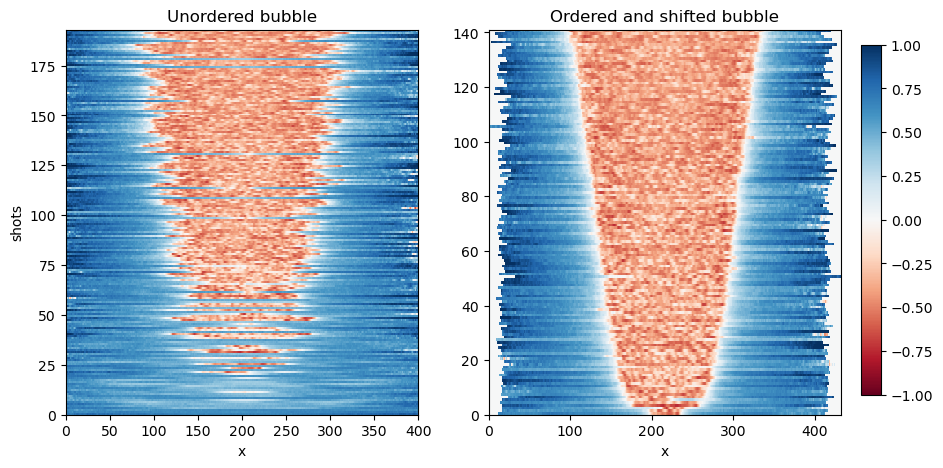

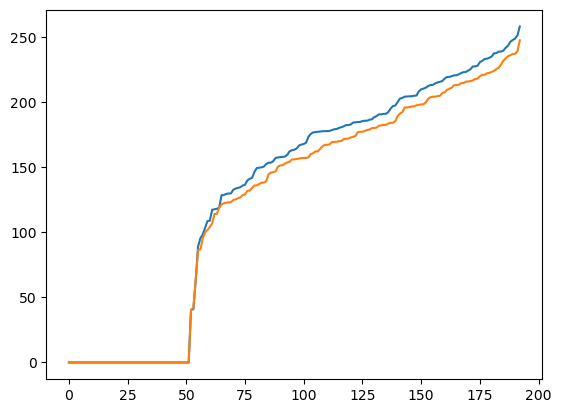

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


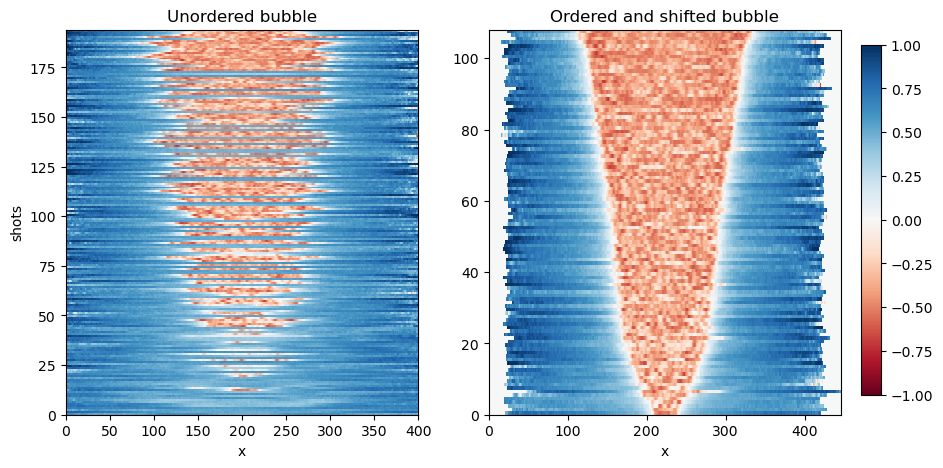

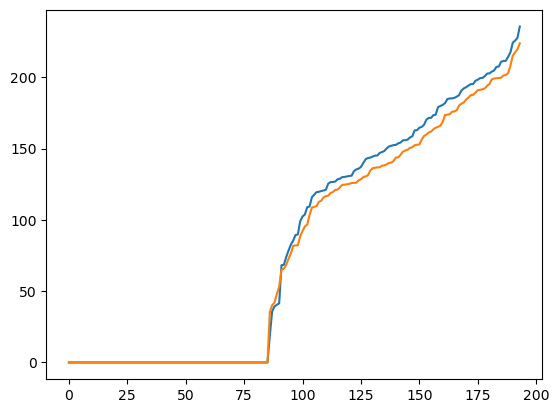

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


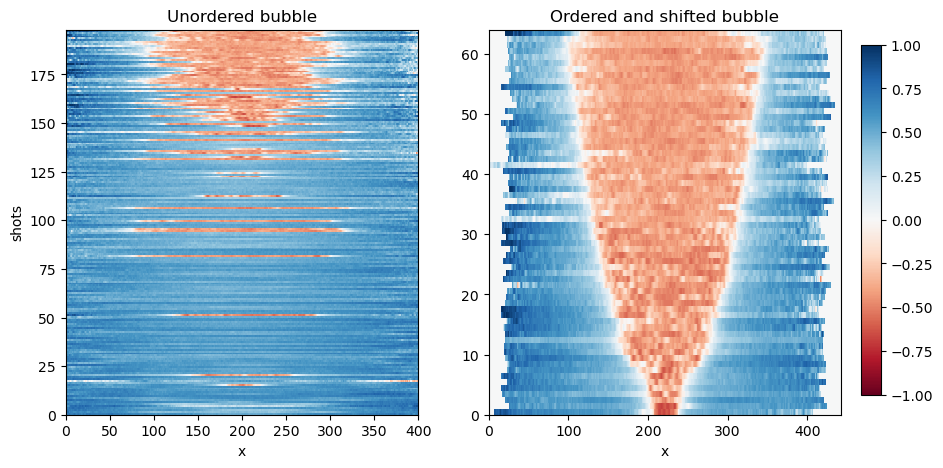

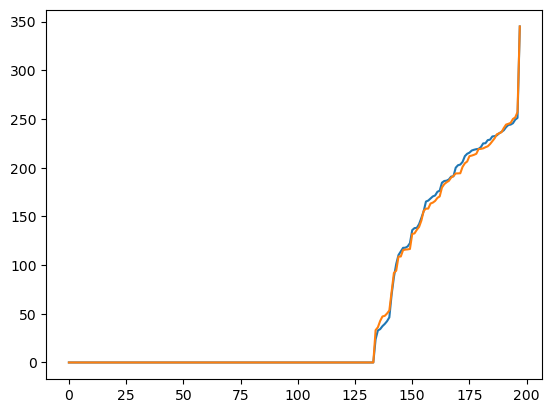

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


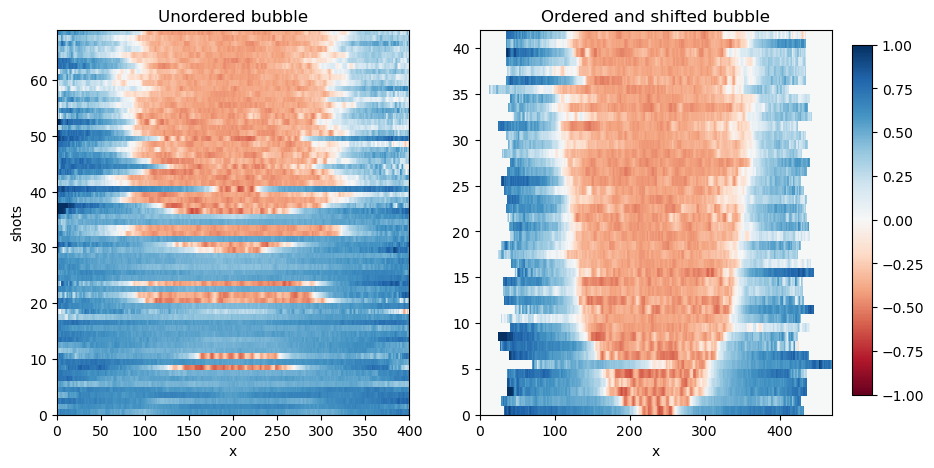

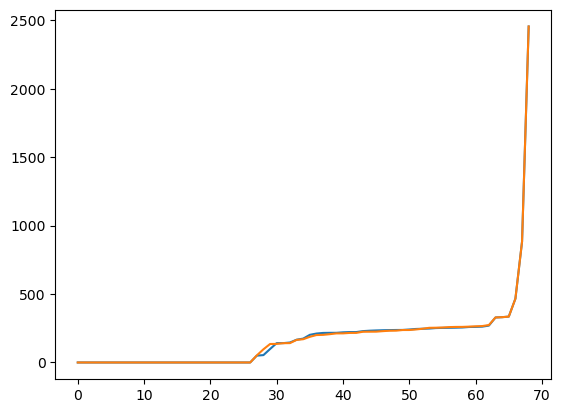

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


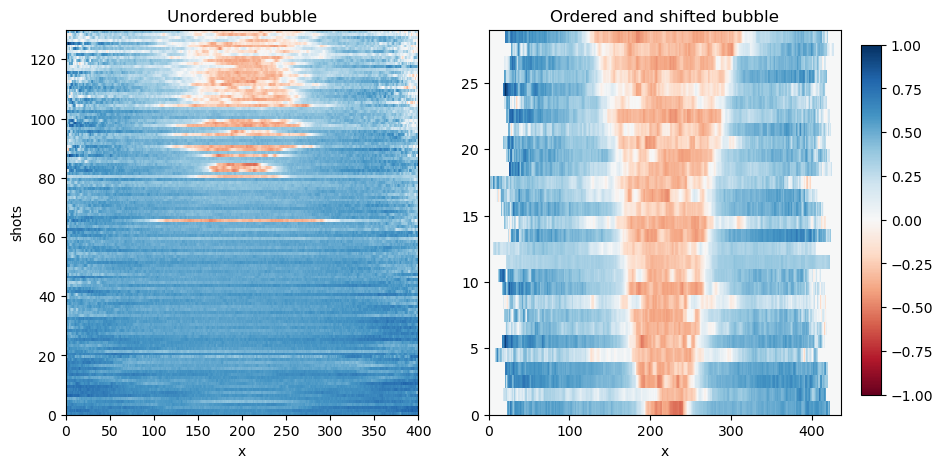

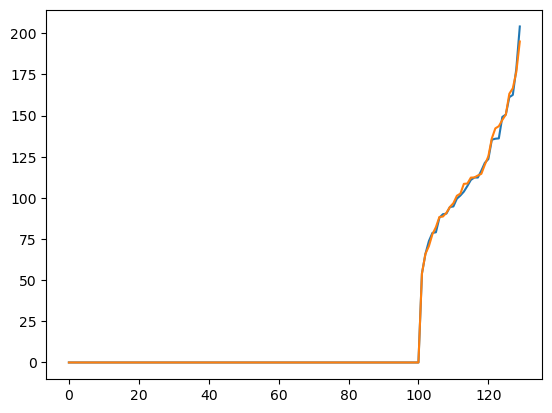

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


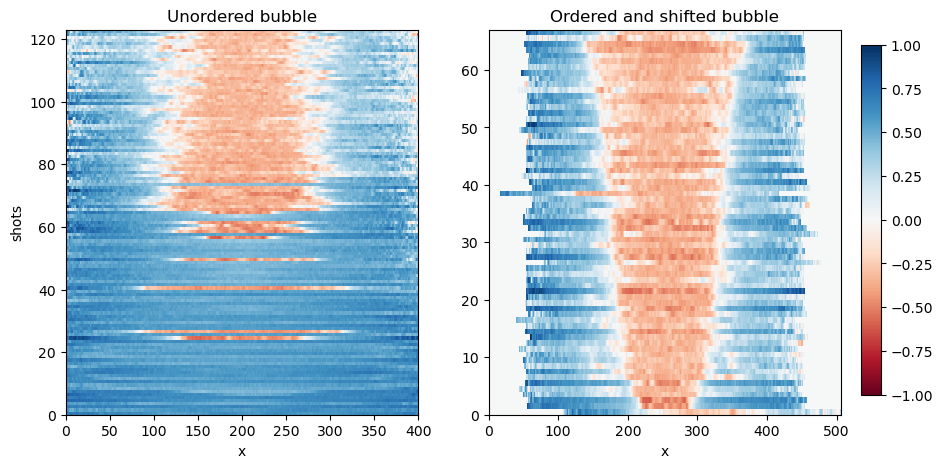

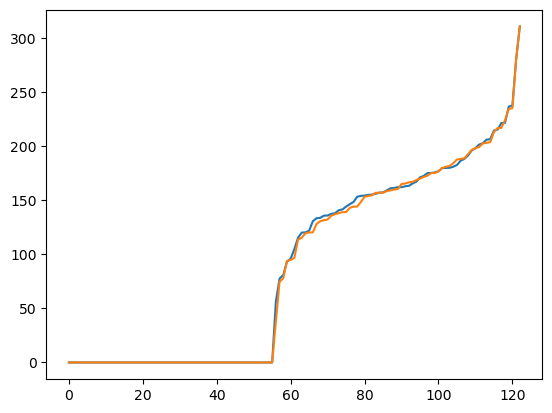

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


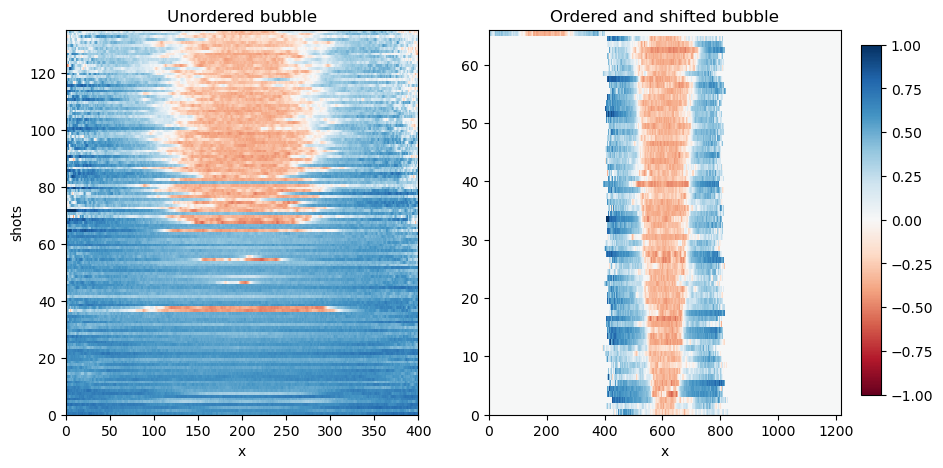

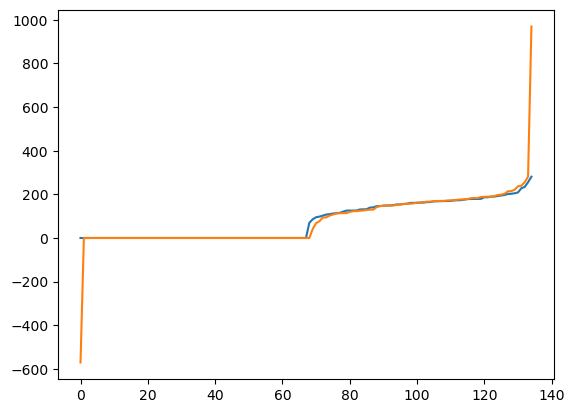

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


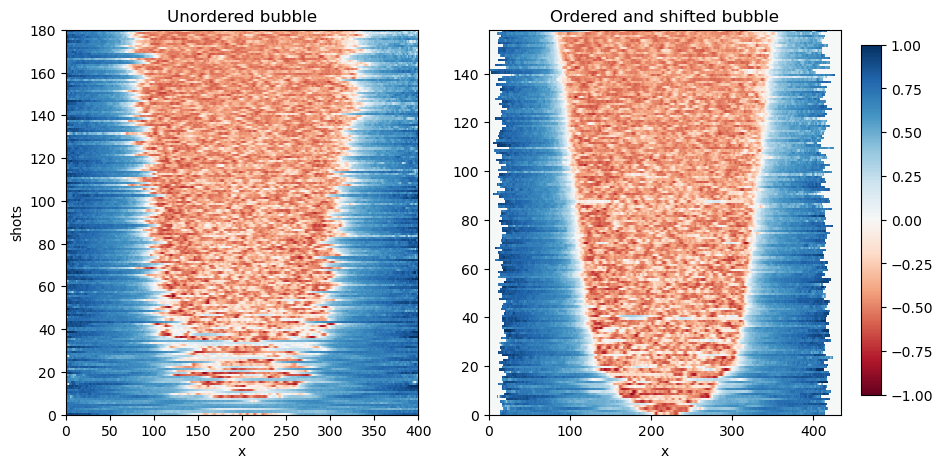

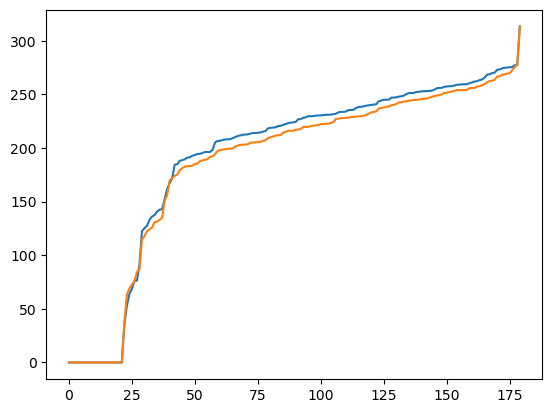

Arctan fit does not work, going with gaussian


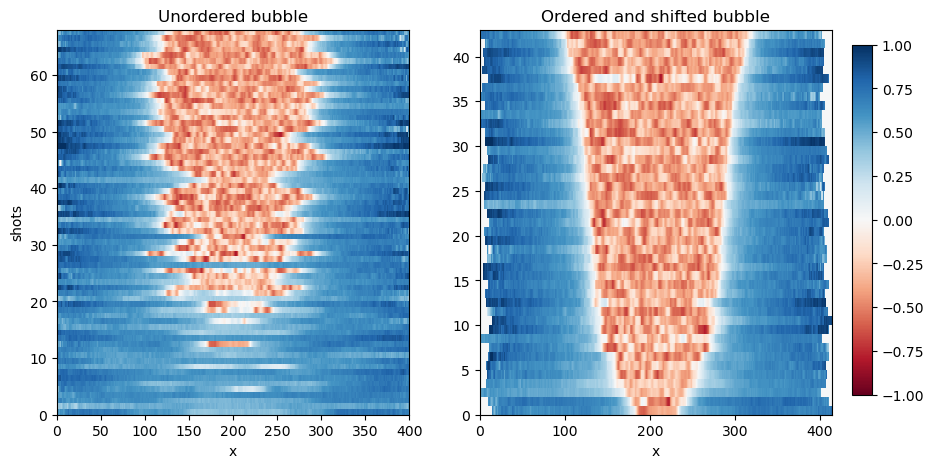

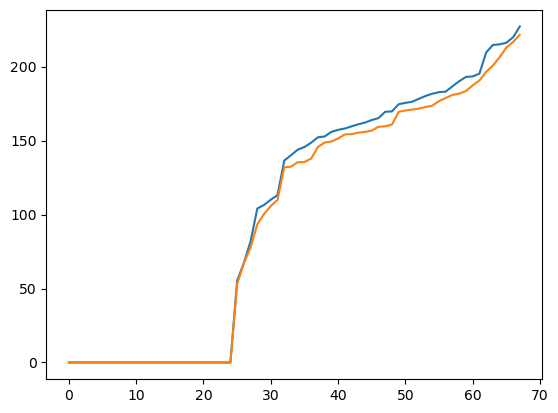

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


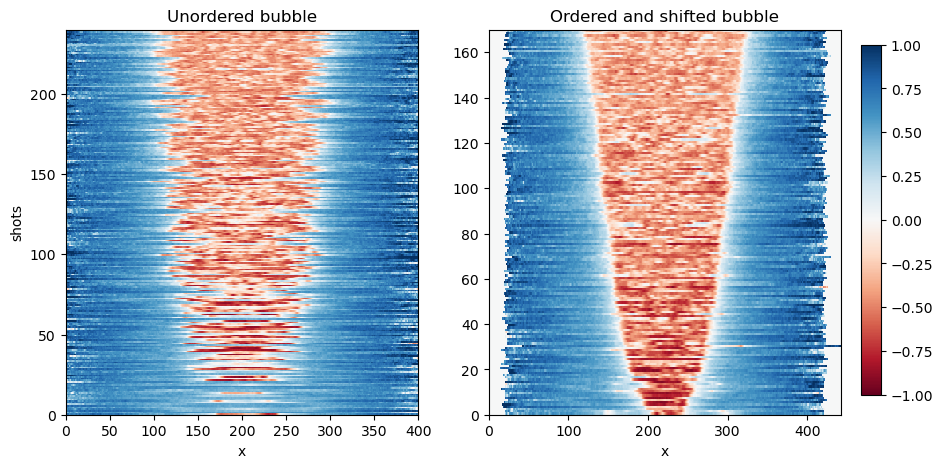

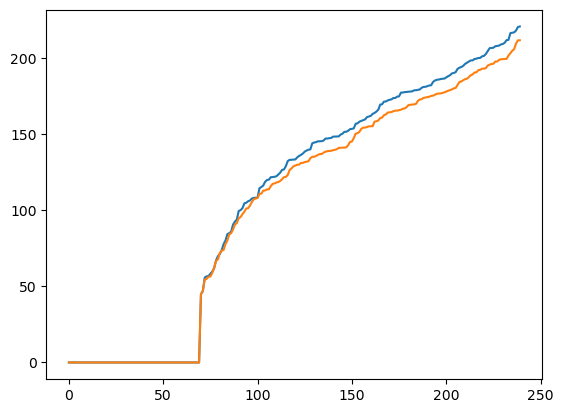

Arctan fit does not work, going with gaussian


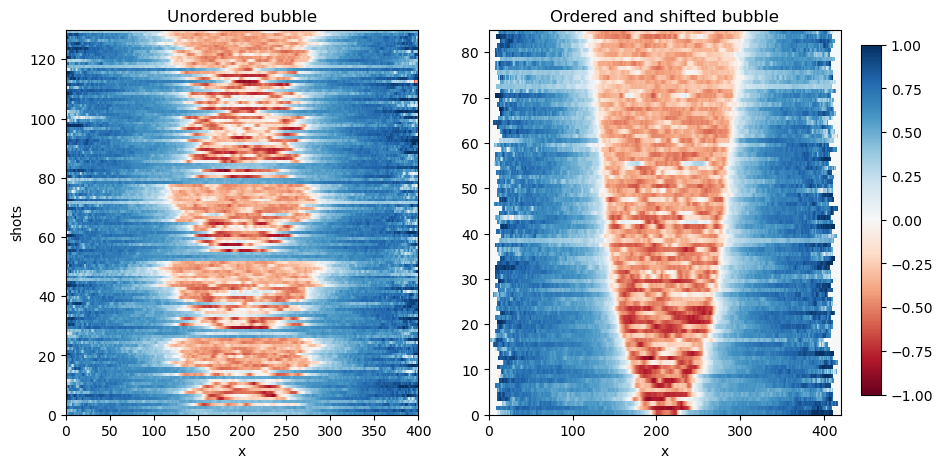

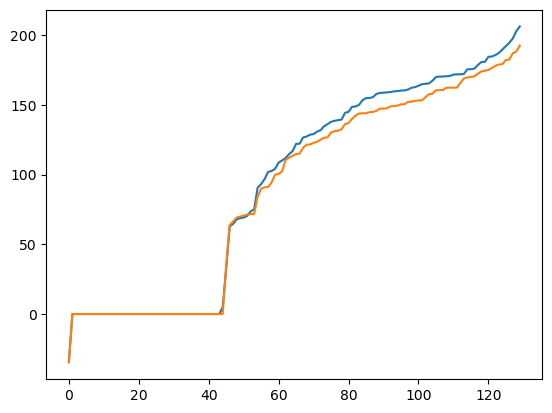

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


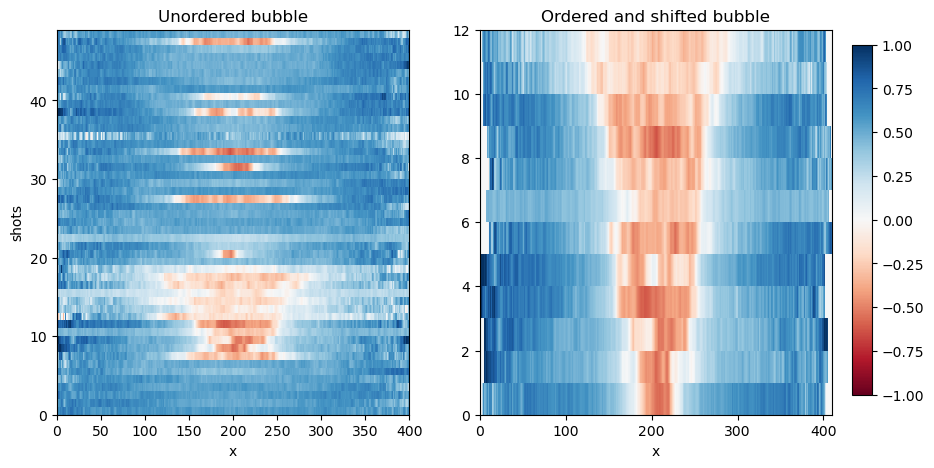

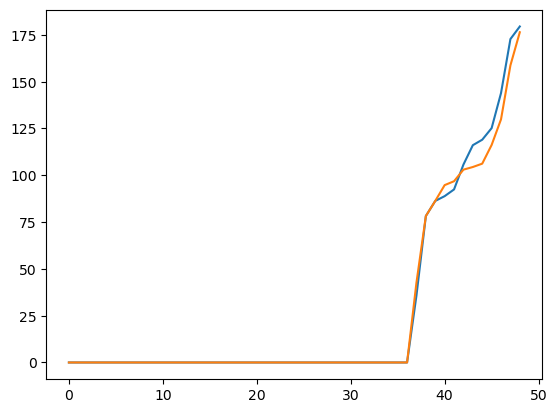

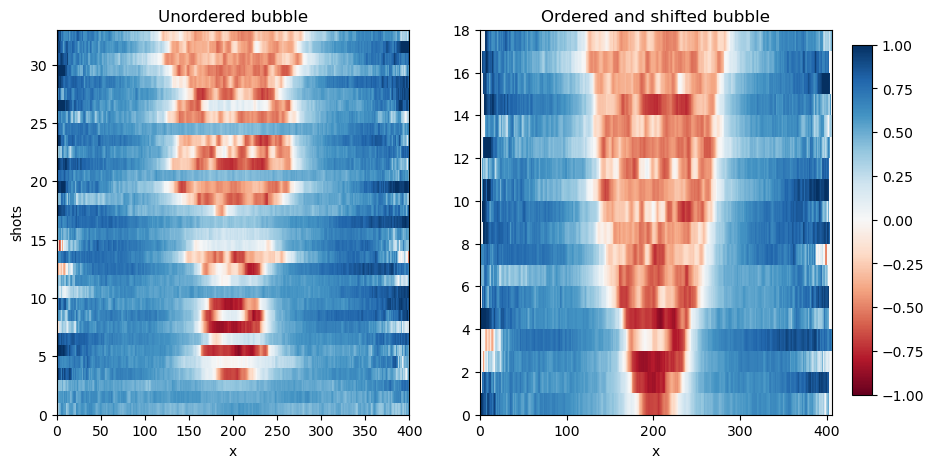

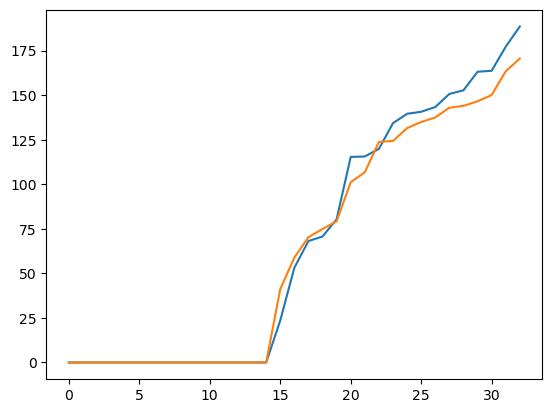

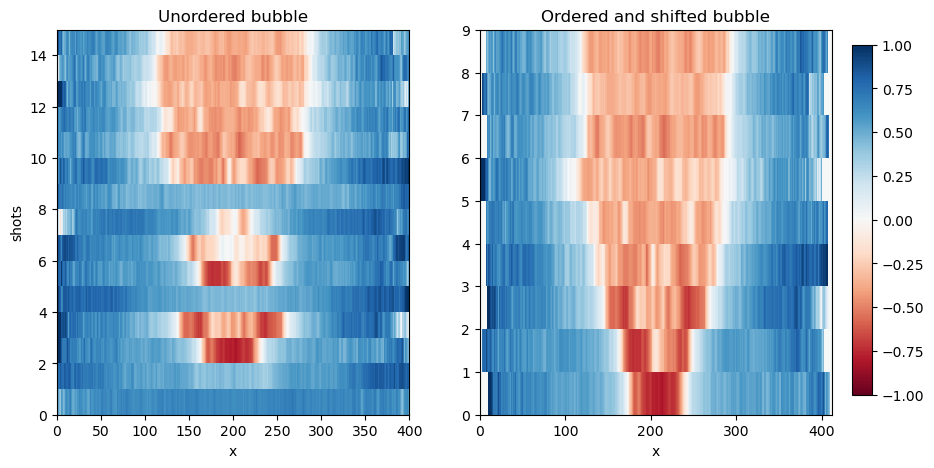

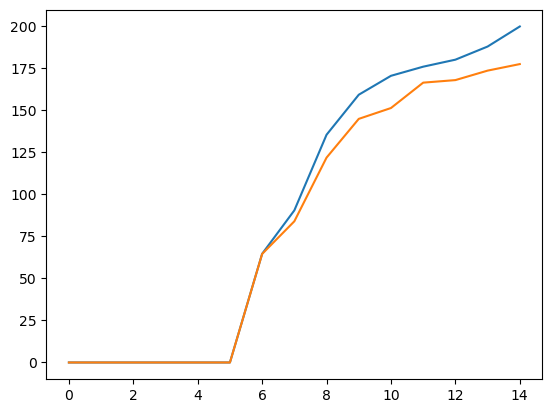

Arctan fit does not work, going with gaussian


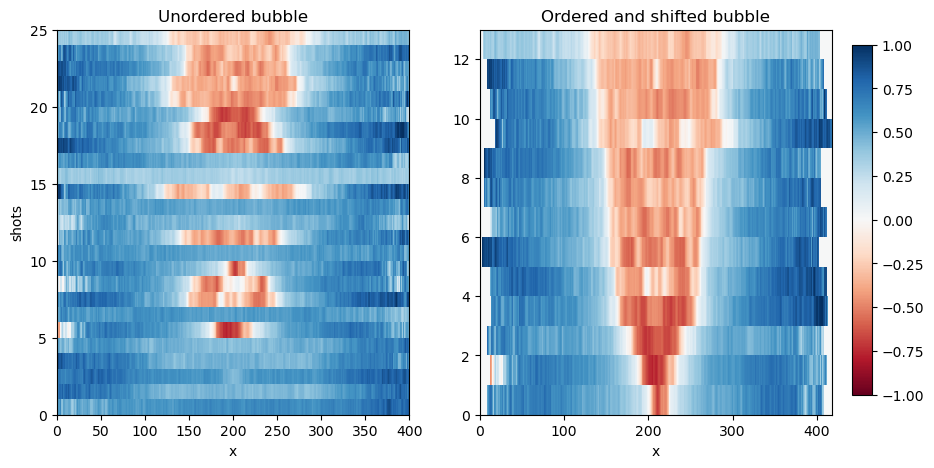

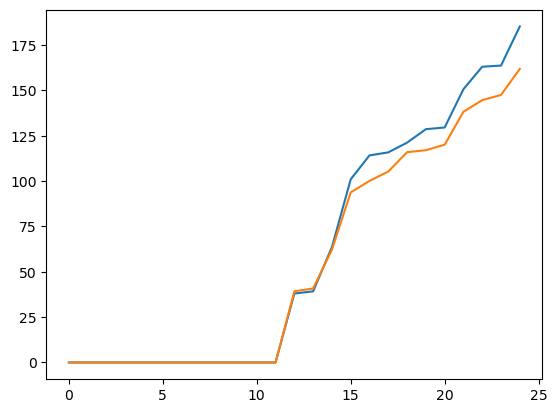

Arctan fit does not work, going with gaussian


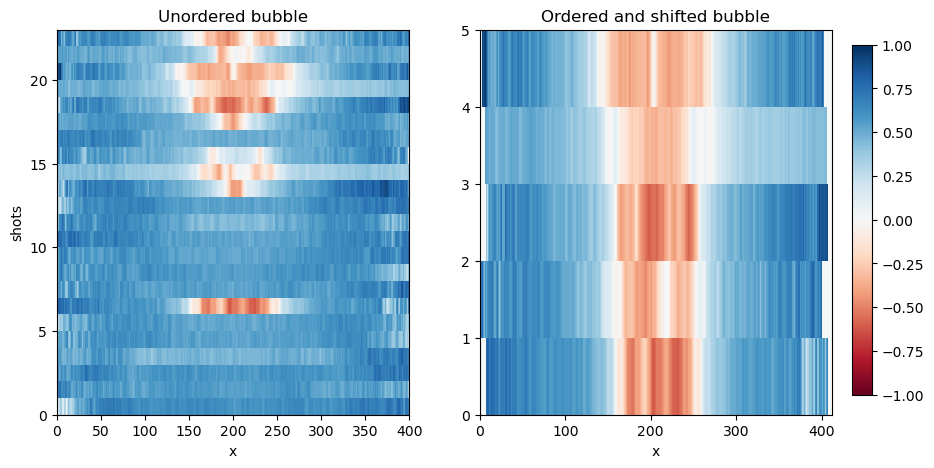

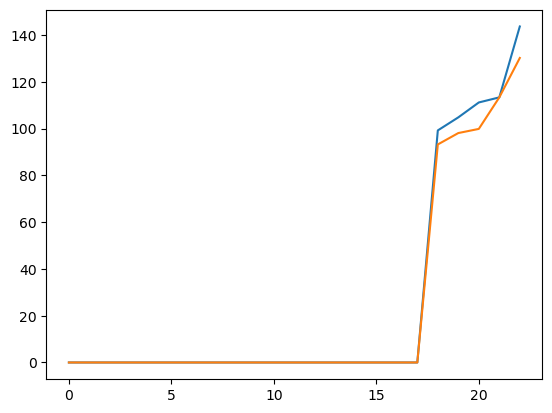

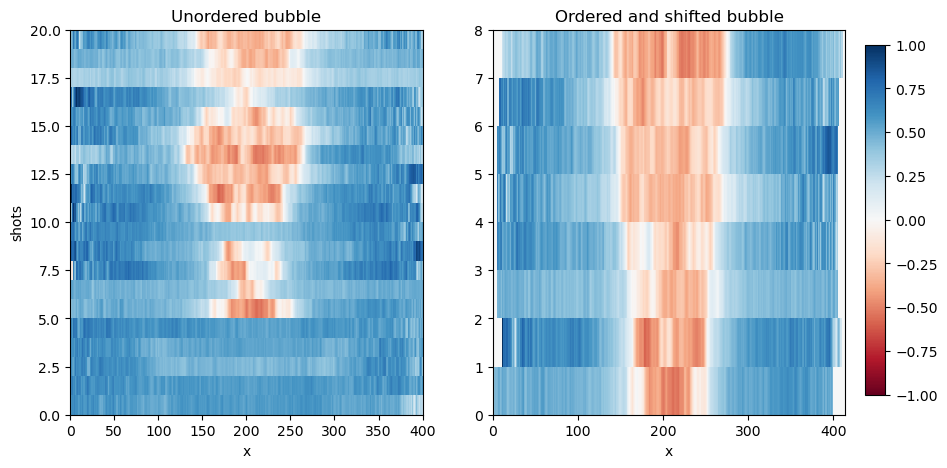

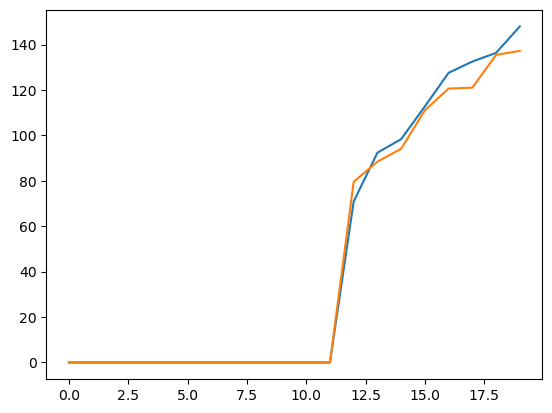

Arctan fit does not work, going with gaussian


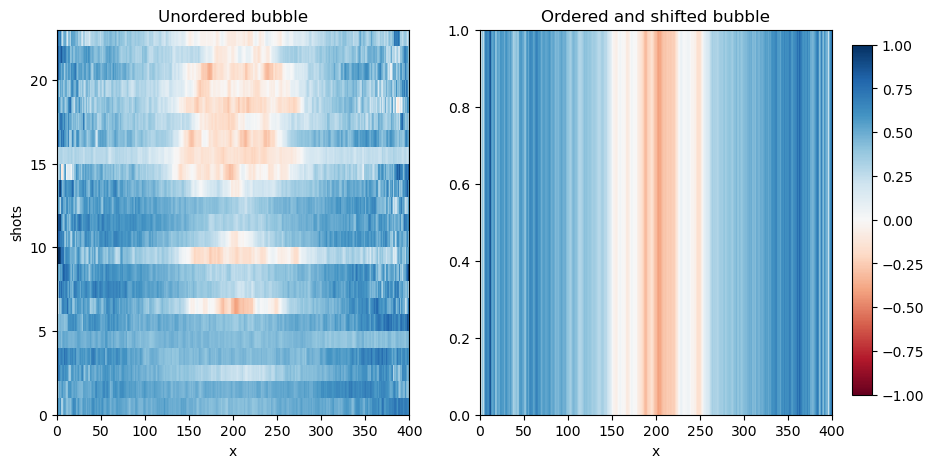

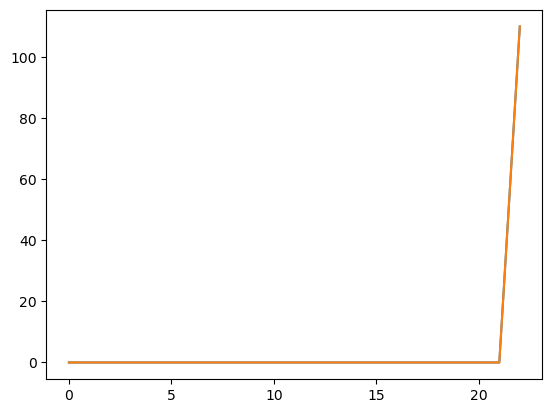

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


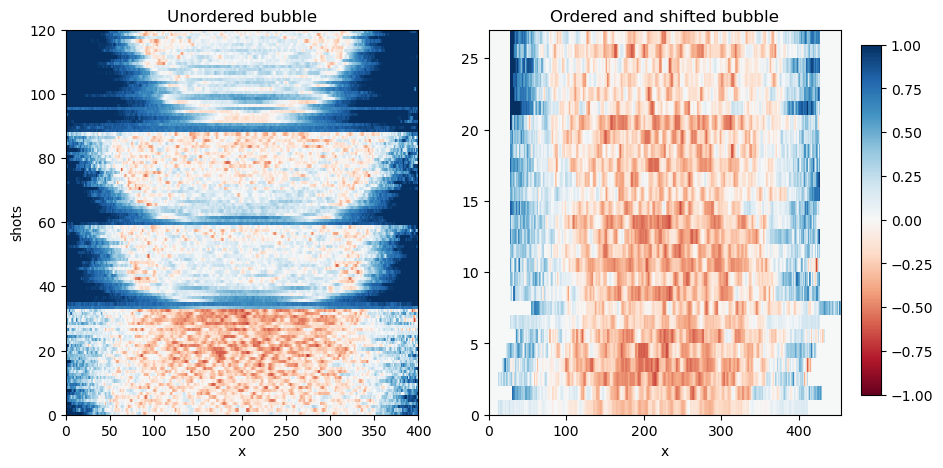

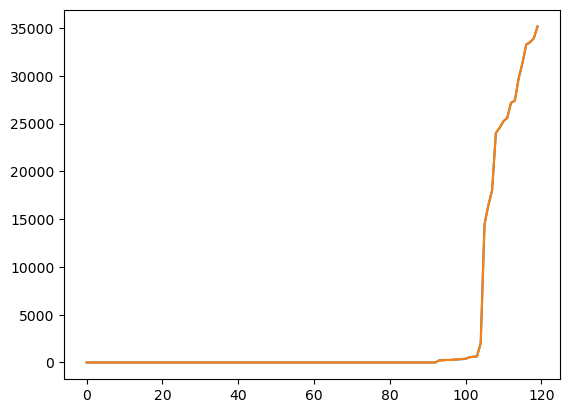

Arctan fit does not work, going with gaussian


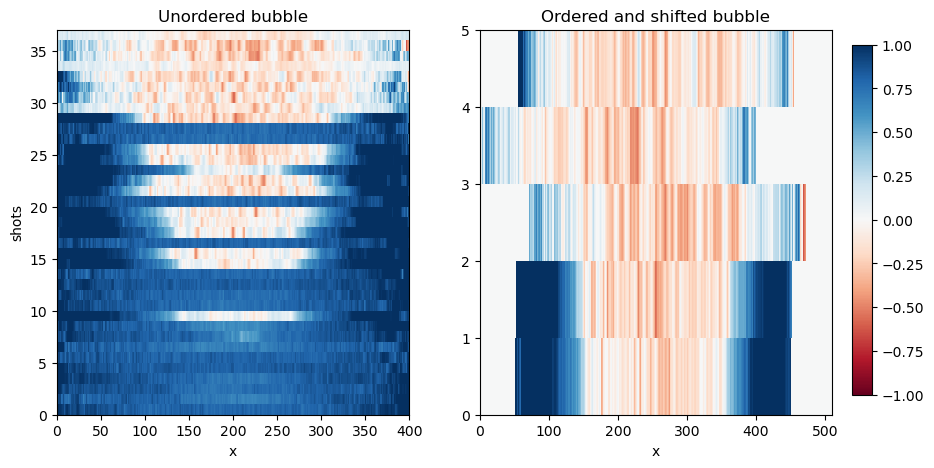

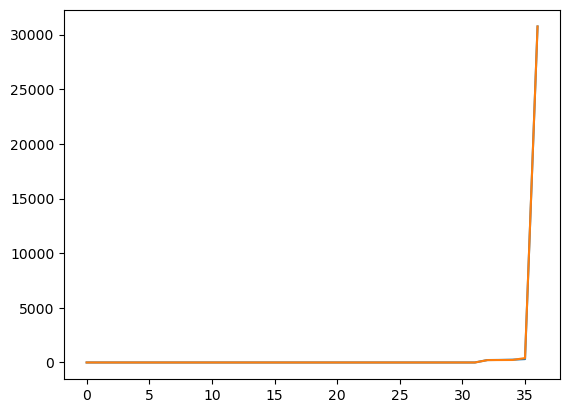

Arctan fit does not work, going with gaussian


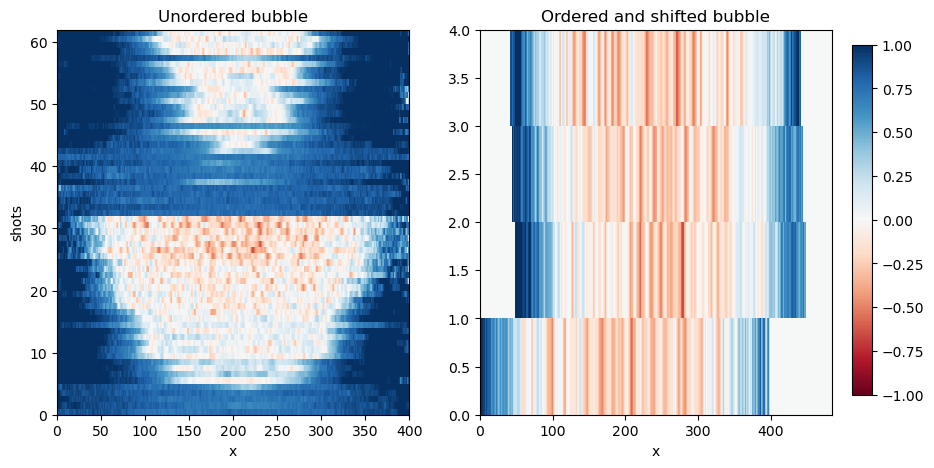

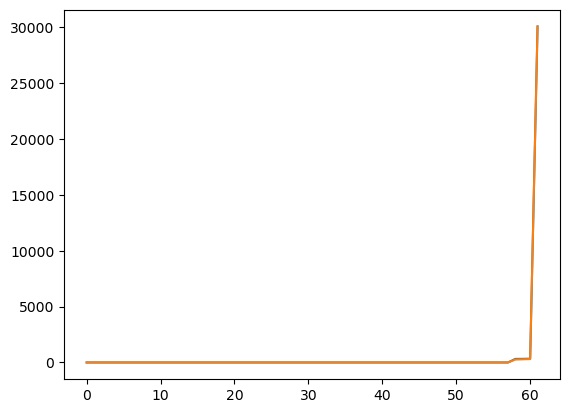

Arctan fit does not work, going with gaussian


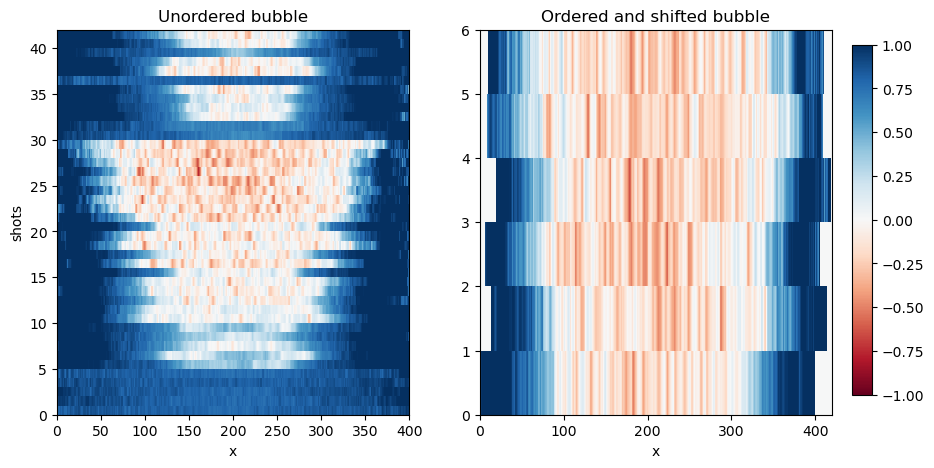

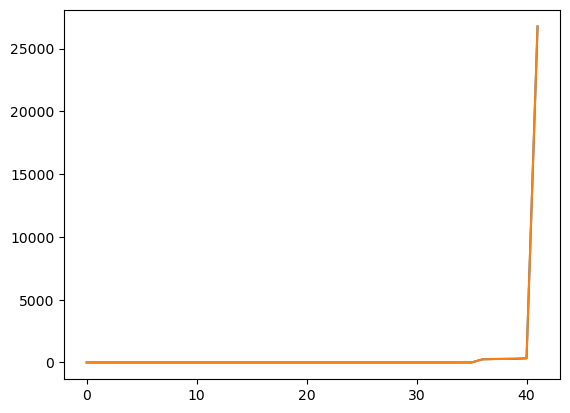

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


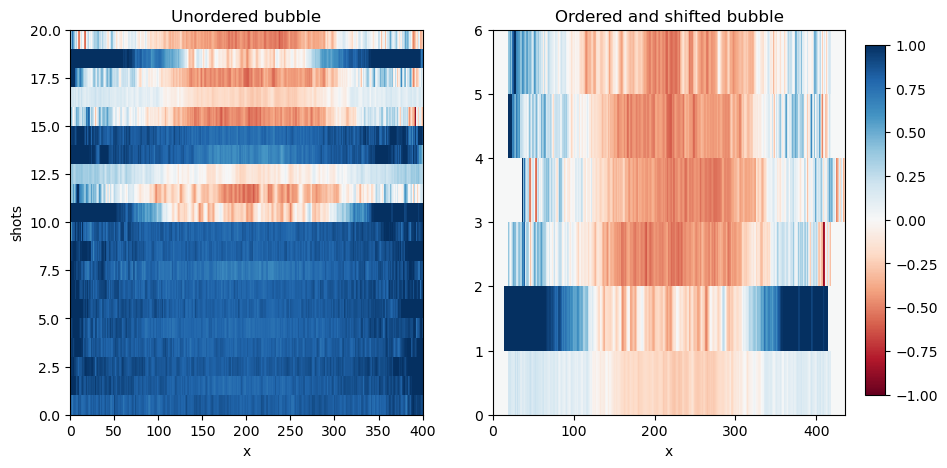

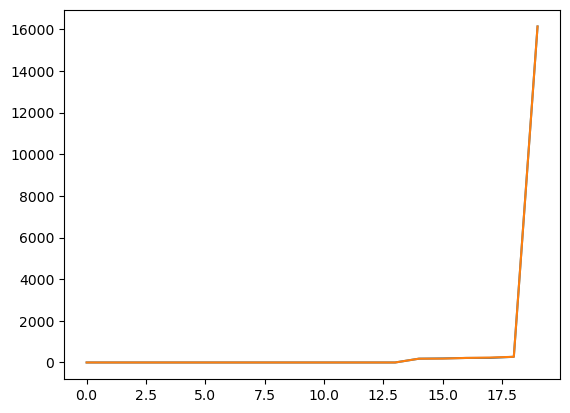

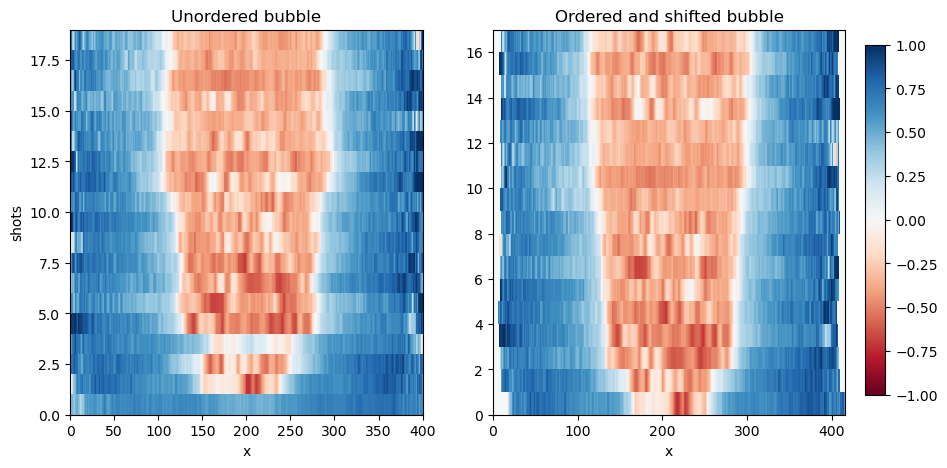

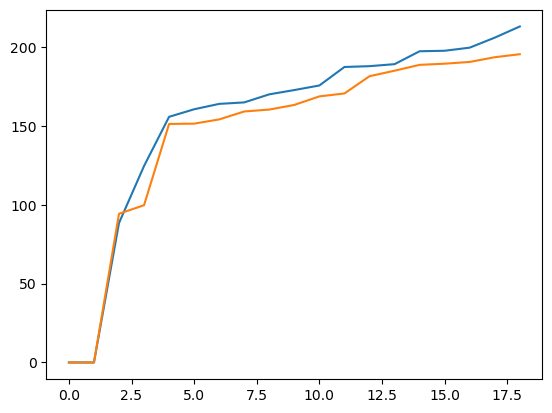

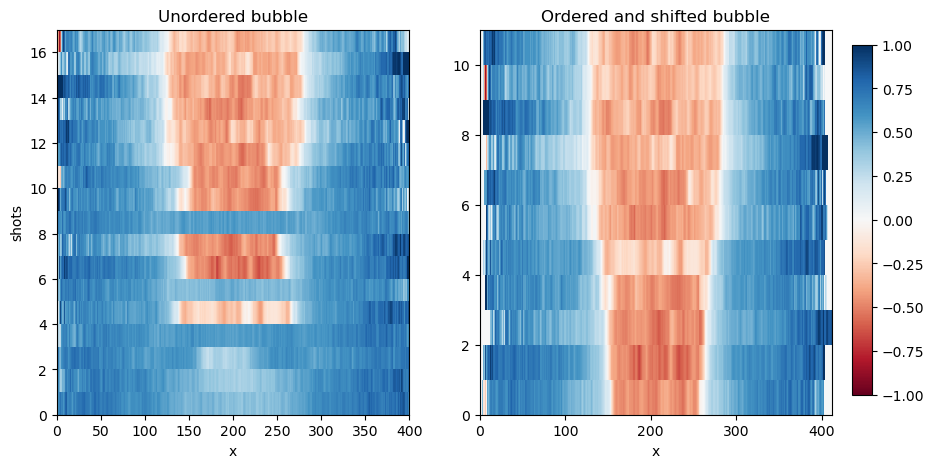

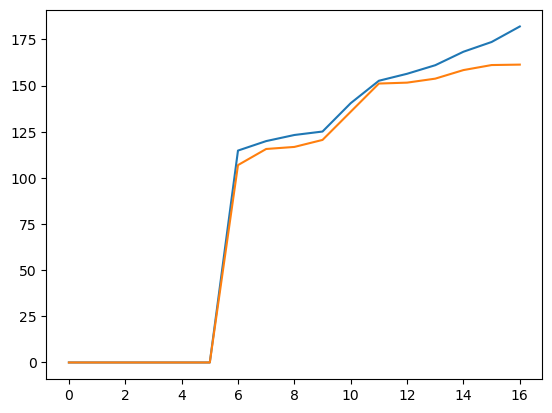

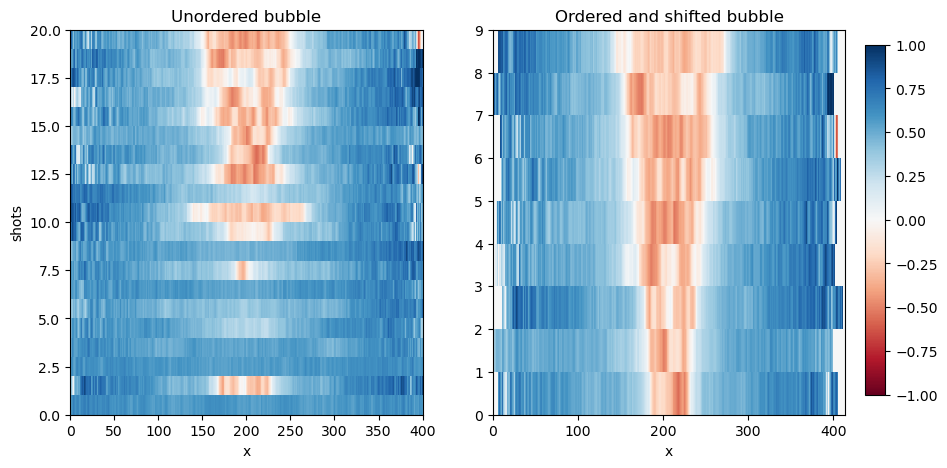

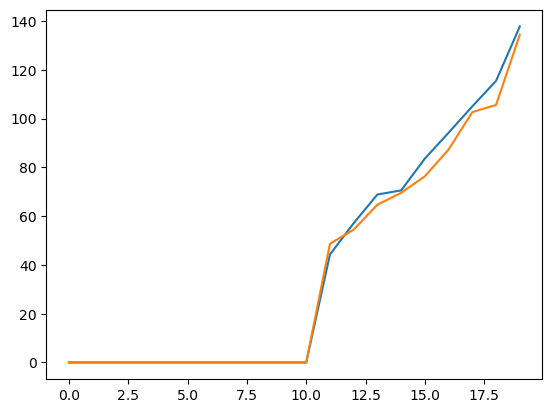

Arctan fit does not work, going with gaussian


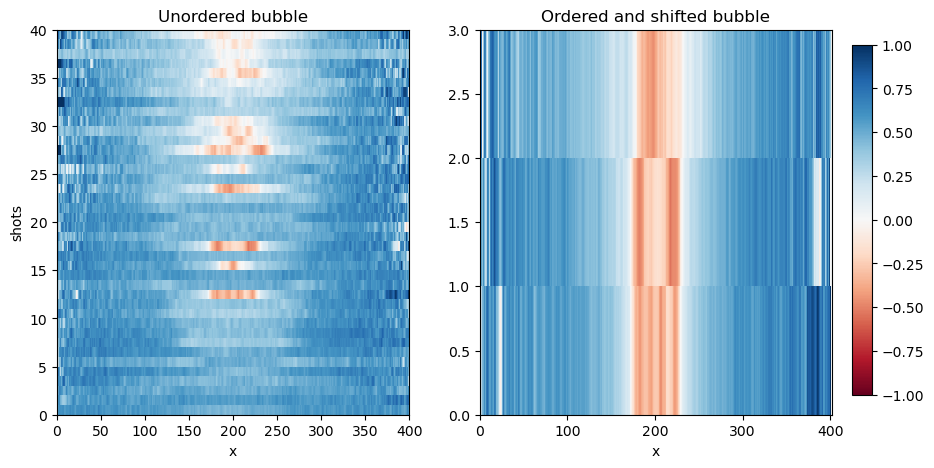

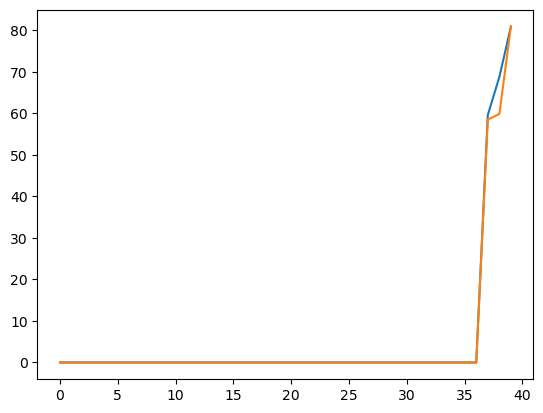

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


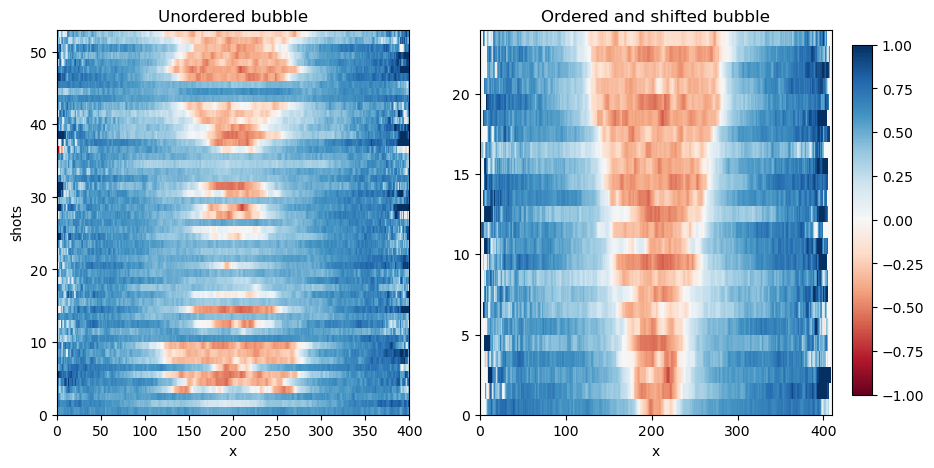

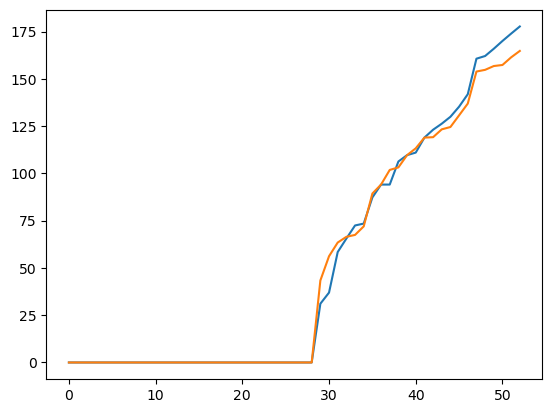

Arctan fit does not work, going with gaussian


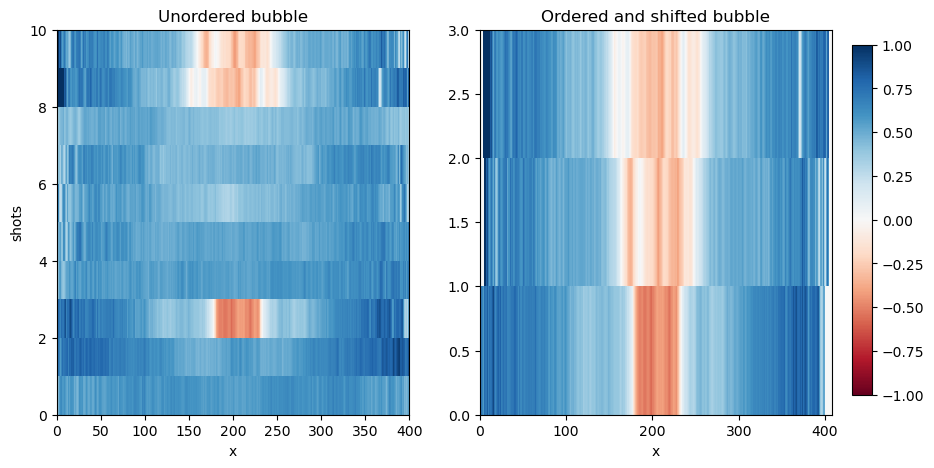

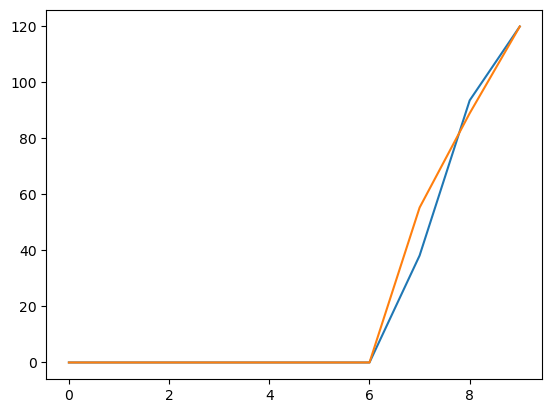

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


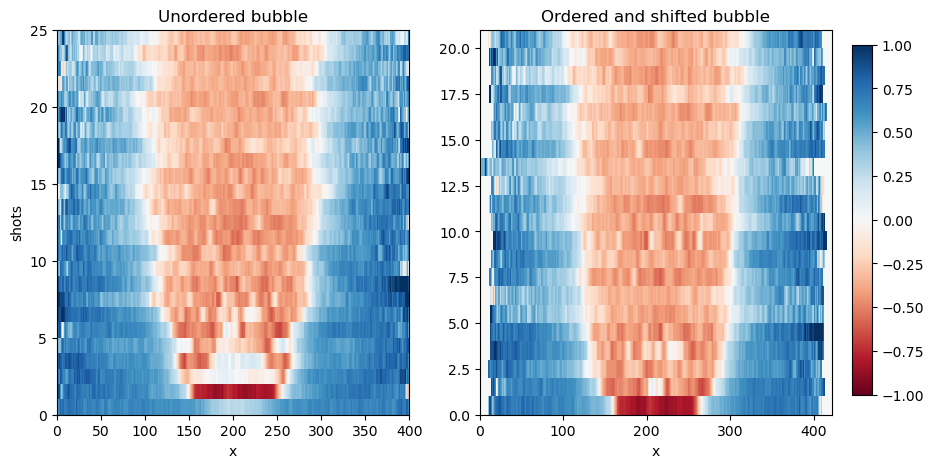

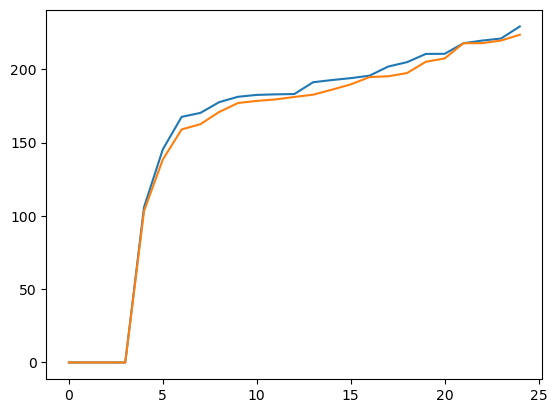

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


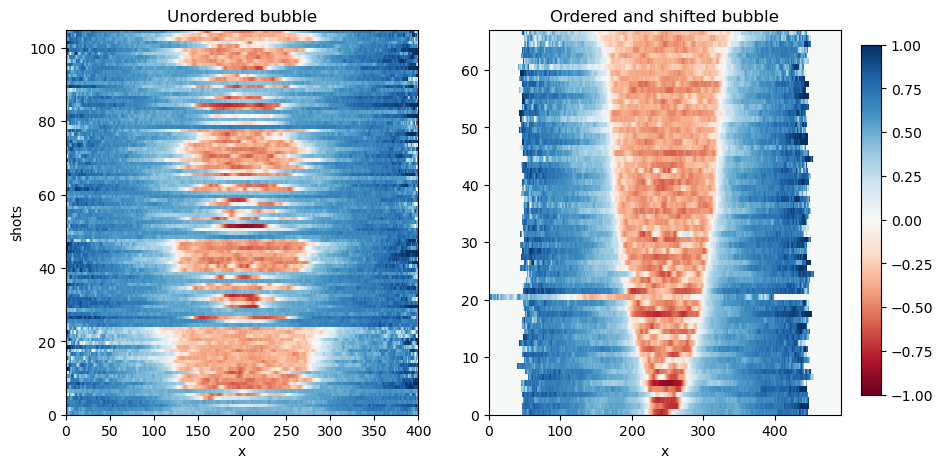

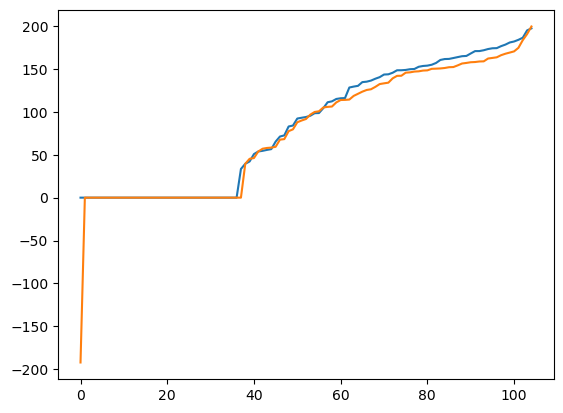

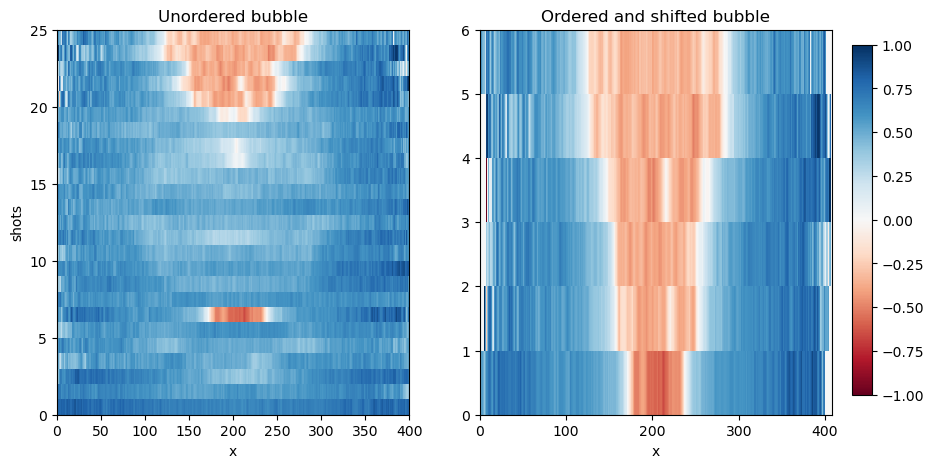

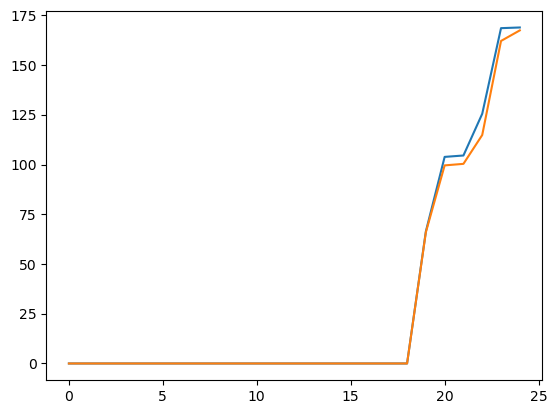

Arctan fit does not work, going with gaussian


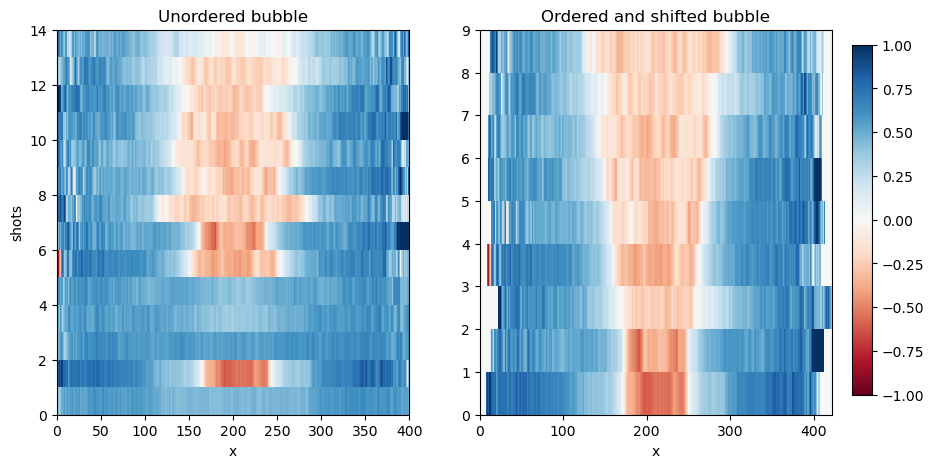

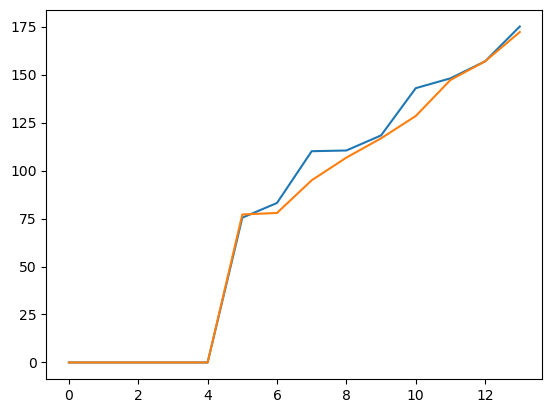

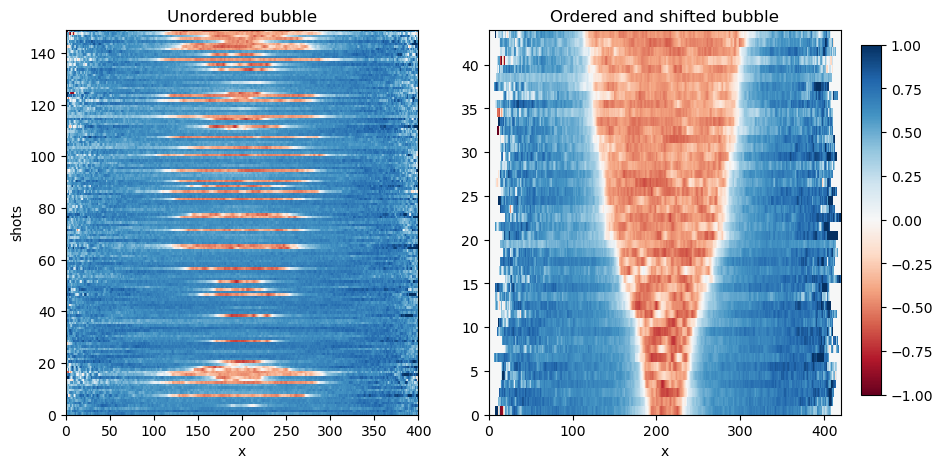

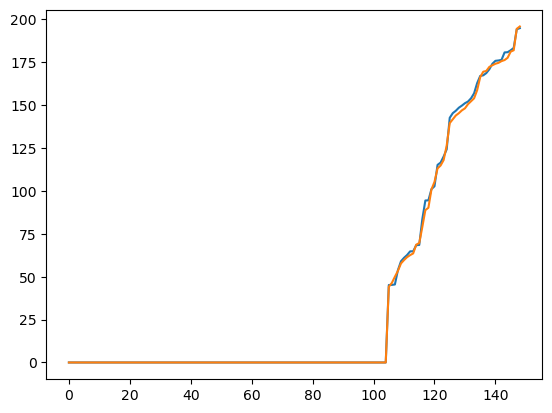

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


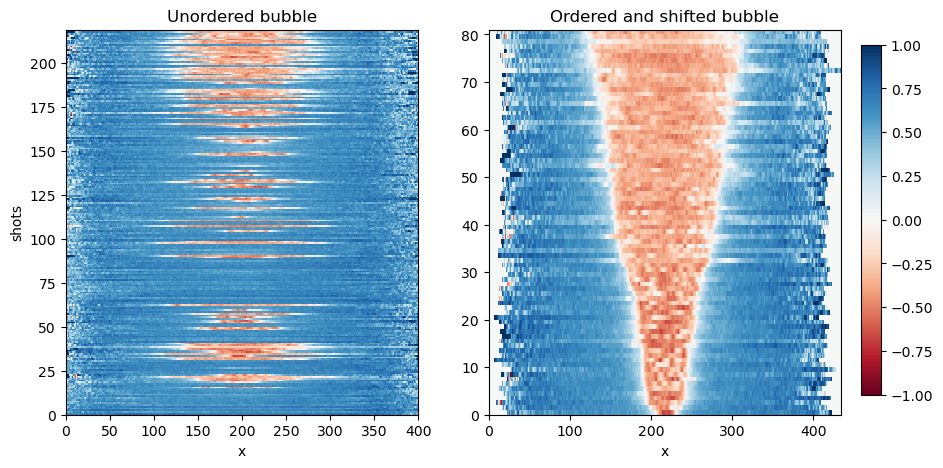

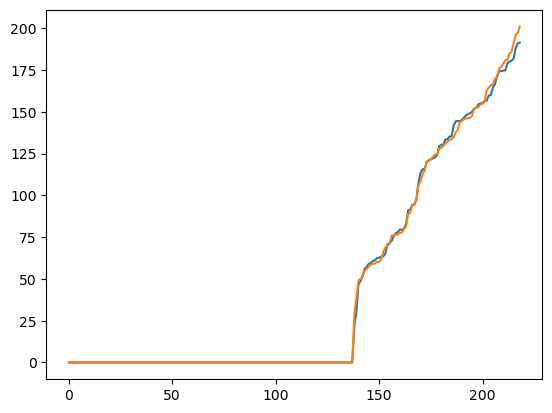

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


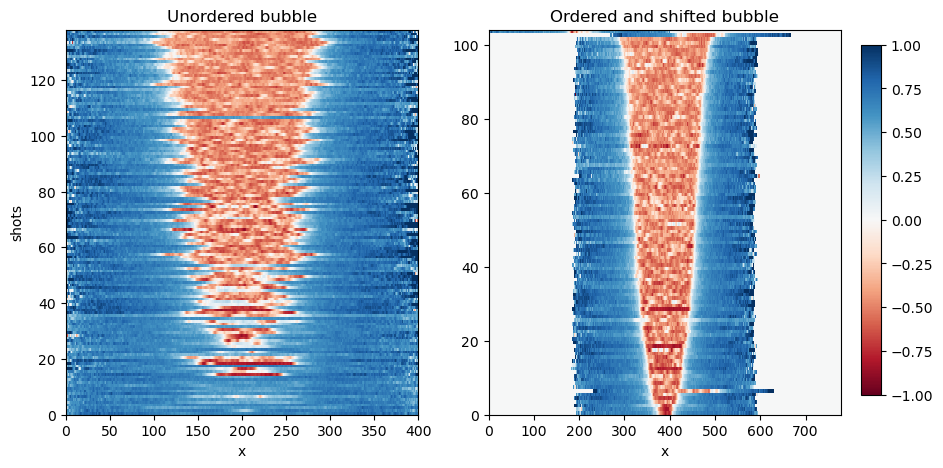

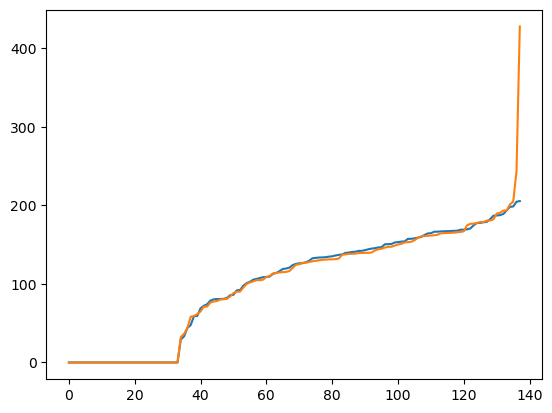

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


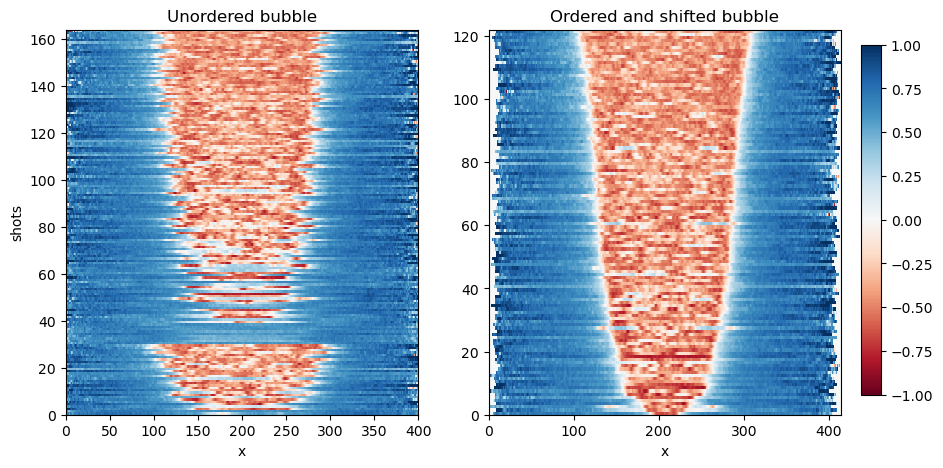

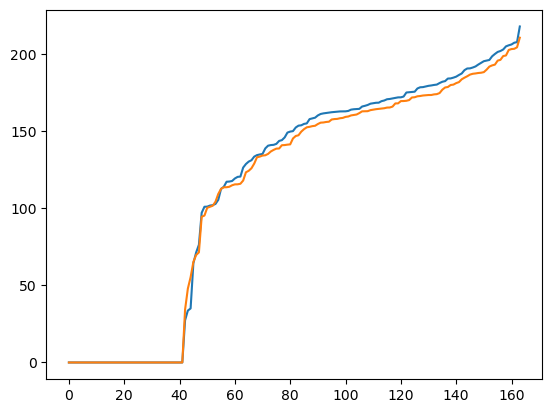

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


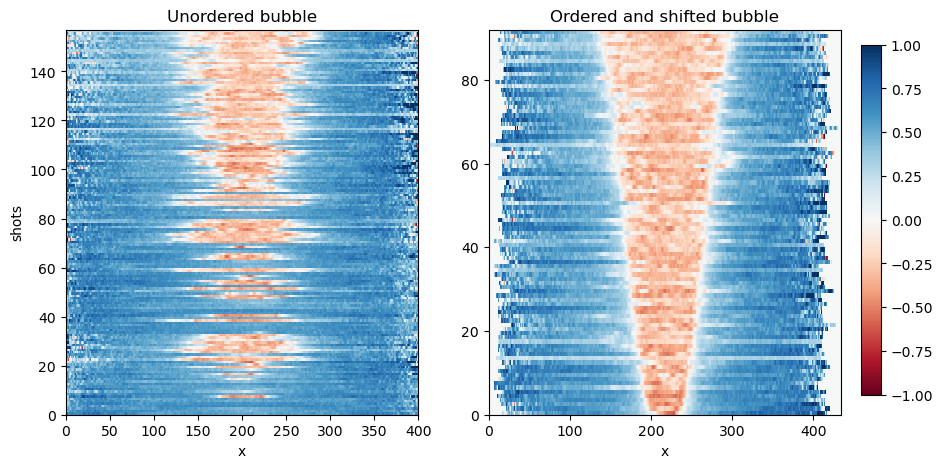

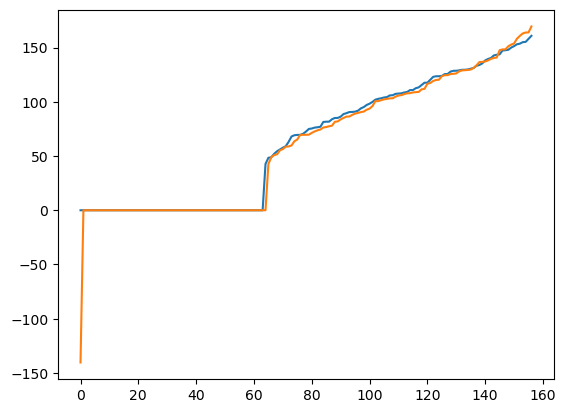

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


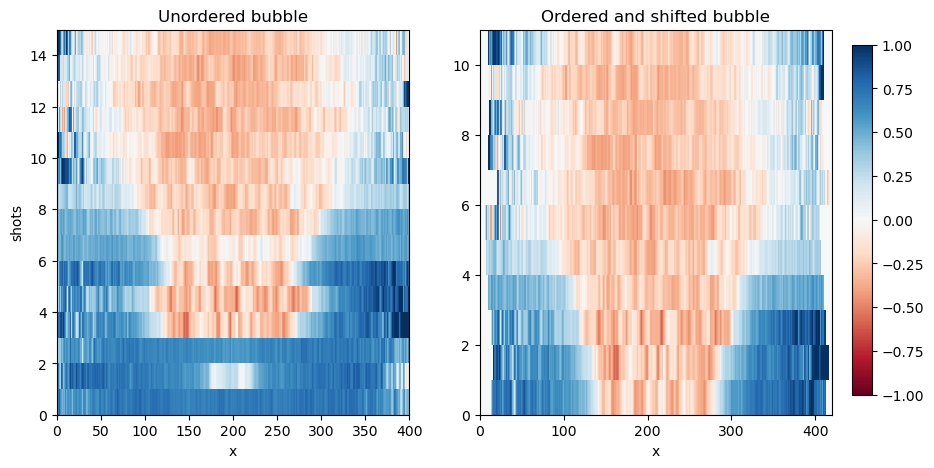

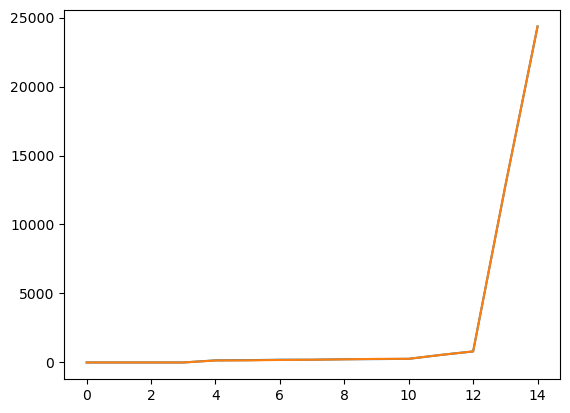

Arctan fit does not work, going with gaussian


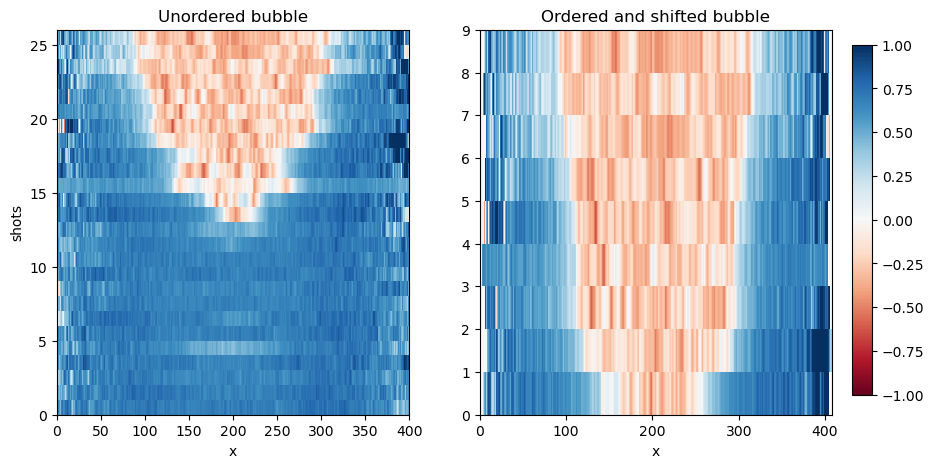

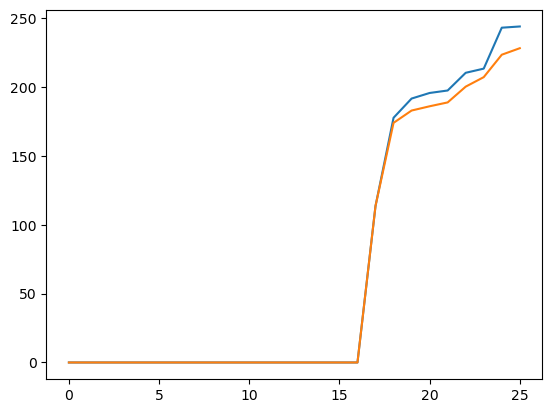

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


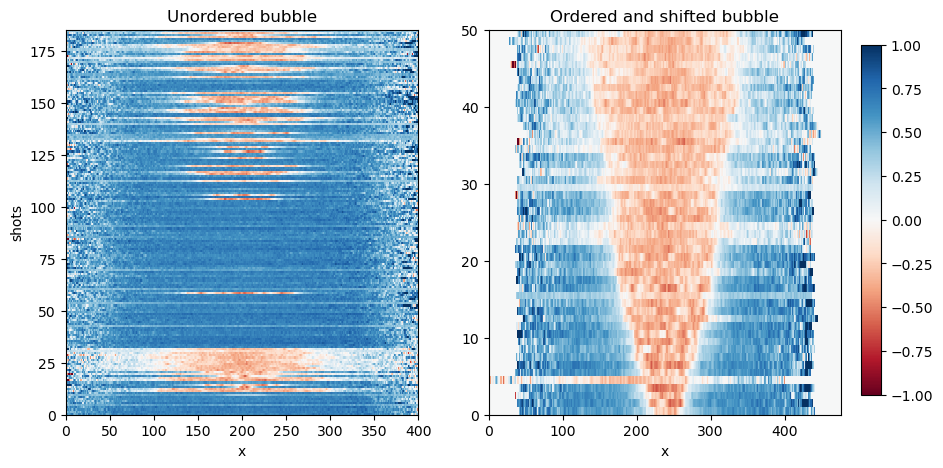

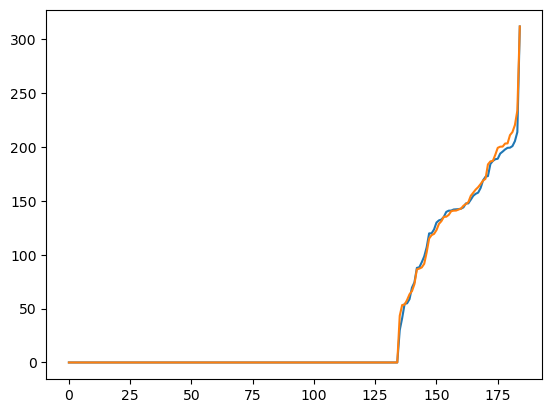

Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian
Arctan fit does not work, going with gaussian


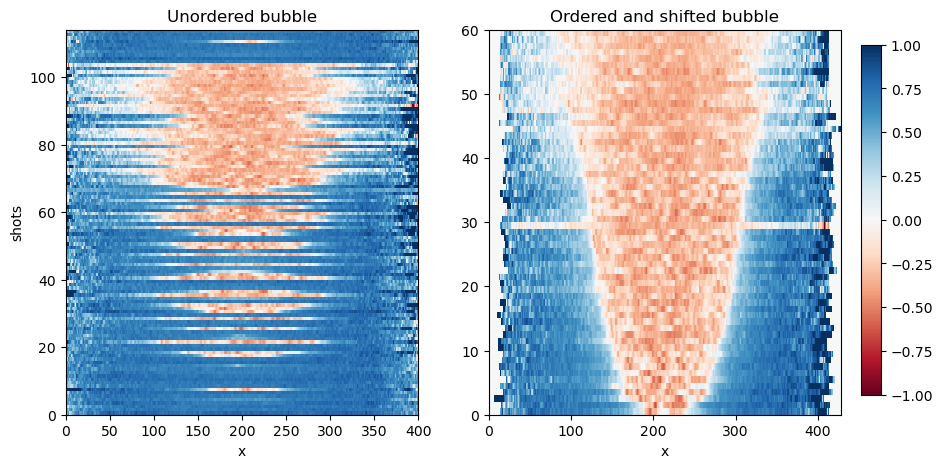

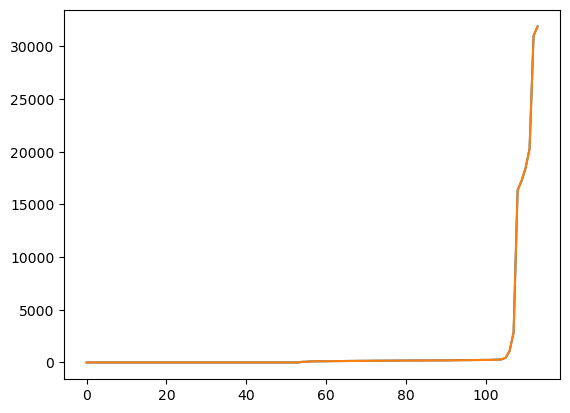

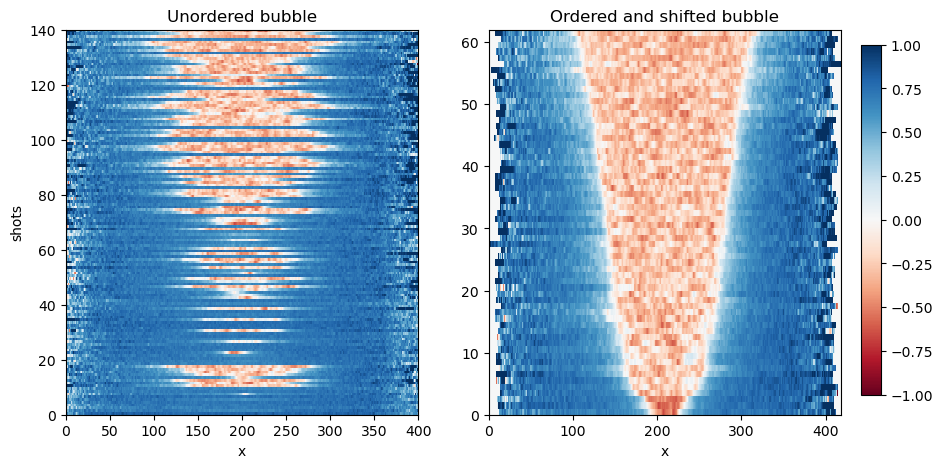

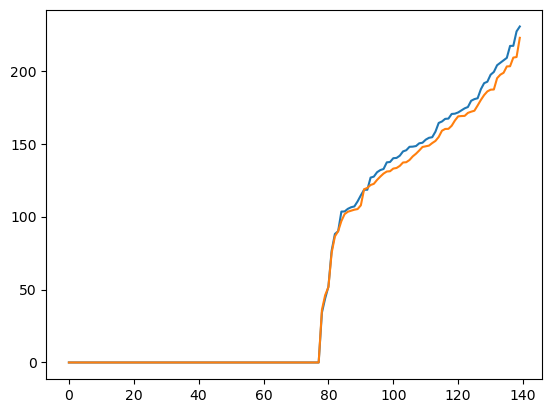

In [6]:
# Parameters
c = 400 # center of the ROI (Region Of Interest)
w = 200 # half width of the ROI
b_check = 20 # half size of the central region used to discriminate the bubble
s_size = 30 # half size of the region to fit the shoulder
threshold = -0.2 # used to discriminate the bubble

# Cycle through days
for fs in np.arange(len(seqs)): # all seqs
#for fs in [2]: # only the first
    df12_ = pd.read_hdf(f[fs]) # importing sequence

    #Cycle through sequences
    for ei, ai in enumerate((seqs[fs])):
        m1 = [] # magnetization UP
        m2 = [] # magnetization DOWN
        time = []
        rep = []

        #Cycle through shots
        for i in ai:
            df12 = df12_[(df12_['sequence_index'].isin([i]))]
            df12 = df12[(df12[('od_remove_thpart', 'N_bec')] > 2e5)] # remove BECs with N < 2e5
            df12 = df12[(df12[('od_remove_thpart', 'N_bec')] < 2e6)] # remove BECs with N > 2e6
            y_axis = 'uW_pulse' # experimental waiting time
            df12 = df12.sort_values(y_axis)
            #print(df12)

            m1 = np.append(m1, df12[('od_remove_thpart', 'm1_1d')]) # add magnetization
            m2 = np.append(m2, df12[('od_remove_thpart', 'm2_1d')]) # add magnetization
            rep = np.append(rep, df12[('Repetition')]) # ??
            time = np.append(time, df12[('uW_pulse')]) # ??
        
        # To array
        m1 = np.array(m1)
        m2 = np.array(m2)
        time = np.array(time)

        # Plotting m1 and m2
        # Z = (m1 - m2)/(m1 + m2)
        # print(np.shape(m1[1])) # shot size
        # plt.plot(np.arange(len(m1[1])), m1[1], 'b', label='UP')
        # plt.plot(np.arange(len(m2[1])), m2[1], 'r', label='DOWN')
        # plt.plot(np.arange(len(Z[0])), Z[0], label='Z')
        # plt.xlabel('x')
        # plt.ylabel('M')
        # plt.grid()
        # plt.legend()
        # plt.show()

        # Cleaning for shape and type misbehaviours
        shape = (800, )
        check = type(np.ndarray(1))
        good = np.array([type(p) == check for p in m1]) # type
        good[good] = [p.shape == shape for p in m1[good]] # shape
        M1 = m1[good]
        M2 = m2[good]
        time = time[good]

        # Selecting Region Of Interest
        ROI = np.s_[:, (c - w):(c + w)] # ROI is wide 2 * w
        D = M1 + M2 * 1.3 # density (with adjutsing param)
        M = (M2 * 1.3 - M1) / D # magnetization (with adjusting param)
        D = np.vstack(D)[ROI]
        M = np.vstack(M)[ROI]
        #print(np.shape(M))

        # Cleaning from absurd densities
        mask_D = ((np.sum(D, axis = 1) > 0.1e5) & (np.sum(D, axis = 1) < 8e5) & (np.sum(M, axis = 1) < 8000))
        D = D[mask_D]
        M = M[mask_D]
        time = time[mask_D]

        # Central region
        b_check_ROI = np.s_[:, (w - b_check):(w + b_check)] # Bubble checking for central region
        Mb = np.mean(M[b_check_ROI], axis=1) # average magnetization in the central 2*b_check pixels

        # Full region
        MK = np.mean(M, axis=1)
        LL = w * (-MK + 1) / 2 # guess bubble size from avg magnetization of full ROI
        
        # Initialising quantities
        xx = np.arange(2 * w)
        b_size = []
        b_sizeADV = []
        b_center = []
        times = np.unique(time) 
        MbList = []
        timeAdvBubble = []

        #Cycle through shots
        for i in np.arange(len(Mb)):
            #initial values for bubble fitting
            init_amp = (0.7 - Mb[i]) / 2
            init_c1 =  w - LL[i]
            init_c2 =  w + LL[i]
            init_off = (0.7 + Mb[i]) / 2
            init_vals = [init_amp, init_c1, init_c2, init_off, 3, 3] 
            MbList.append(Mb[i])

            # Fitting the curve only if Mb is under the threshold value
            if Mb[i] < threshold:
                try:
                    # Fitting with bubble function
                    best_2arctan, covar_2arctan = curve_fit(bubble, xx, M[i], p0 = init_vals)

                    # Initial values for bubbleshoulder fit
                    init_BS_left = [best_2arctan[0] * 0.7, best_2arctan[1], best_2arctan[3], best_2arctan[4]]
                    init_BS_right = [-best_2arctan[0] * 0.7, best_2arctan[2], best_2arctan[3], best_2arctan[5]]

                    # Left shoulder fit
                    xx_left = xx[int((round(best_2arctan[1])) - s_size) : int(round(best_2arctan[1])) + s_size]
                    Mi_left = M[i][int((round(best_2arctan[1])) - s_size) : int(round(best_2arctan[1])) + s_size]
                    best_BS_left, covar_BS_left = curve_fit(bubbleshoulder, xx_left, Mi_left, p0 = init_BS_left)

                    # Right shoulder fit
                    xx_right = xx[int((round(best_2arctan[2])) - s_size) : int(round(best_2arctan[2])) + s_size]
                    Mi_right = M[i][int((round(best_2arctan[2])) - s_size) : int(round(best_2arctan[2])) + s_size]
                    best_BS_right, covar_BS_right = curve_fit(bubbleshoulder, xx_right, Mi_right, p0 = init_BS_right)

                    # Plot bubble and bubbleshoulder fit
                    # plt.plot(xx, M[i])
                    # plt.plot(xx, bubble(xx, *best_2arctan))
                    # plt.plot(xx_left, bubbleshoulder(xx_left, *best_BS_left))
                    # plt.plot(xx_right, bubbleshoulder(xx_right, *best_BS_right))
                    # plt.title('Arctan and shoulders fit')
                    # plt.xlabel('x')
                    # plt.ylabel('M')
                    # plt.grid()
                    # plt.show()

                    # Bubble center and size
                    # print(f"b_center = {int(best_BS_right[1] / 2 + best_BS_left[1] / 2) - 150}")
                    # print(f"b_size = {best_2arctan[2] - best_2arctan[1]}")
                    # b_center.append(int(best_BS_right[1] / 2 + best_BS_left[1] / 2) - 150) # why 150?
                    b_center.append(int(best_BS_right[1] / 2 + best_BS_left[1] / 2))
                    b_size.append(best_2arctan[2] - best_2arctan[1])
                    b_sizeADV.append(best_BS_right[1] - best_BS_left[1])

                    #print('Arctan fit working')
                
                except:
                    print('Arctan fit does not work, going with gaussian')

                    # Gaussian fit
                    best_GS, covar_GS = curve_fit(gauss, xx, M[i], p0 = [2, w, 10, .7])

                    # Plot gaussian fit
                    # plt.plot(xx, M[i])
                    # plt.plot(xx, gauss(xx, *best_GS))
                    # plt.grid()
                    # plt.title('Gaussian fit')
                    # plt.xlabel('x')
                    # plt.ylabel('M')
                    # plt.show()
                    
                    # Bubble center and size
                    b_size.append(best_GS[2] * 2.355)
                    b_sizeADV.append(best_GS[2] * 2.355)
                    b_center.append(w)

            # Over the threshold value, the bubble is not formed, hence everything set to 0
            else: 
                #print("Over threshold")
                b_size.append(0)
                b_sizeADV.append(0)
                b_center.append(0)
        
        b_size = np.array(b_size)
        b_sizeADV = np.array(b_sizeADV) 
        b_center = np.array(b_center) 

        # Plotting the bubble (unordered)
        fig, ax = plt.subplots(figsize = (10, 5), ncols = 2)
        ax[0].pcolormesh(M, vmin = -1, vmax = +1, cmap = 'RdBu')
        ax[0].set_title('Unordered bubble')
        ax[0].set_xlabel('x')
        ax[0].set_ylabel('shots')

        Zlist = np.argsort(b_sizeADV)
        Z = (M[Zlist])[np.where(b_sizeADV[Zlist] > 0)]
        b_sizeADV_sorted = (b_sizeADV[Zlist])[np.where(b_sizeADV[Zlist] > 0)]
        b_center_sorted = (b_center[Zlist])[np.where(b_sizeADV[Zlist] > 0)]

        # Shifting
        length = 2 * w
        shift = - b_center_sorted + length/2
        #print(shift)
        max_shift = np.max(np.abs(shift))
        #print(max_shift)
        Z_shifted = np.zeros((len(Z), length + 2 * int(max_shift)))
        for i in np.arange(len(Z_shifted)):
            Z_shifted[i, (int(max_shift + int(shift[i]))) : (int(max_shift) + int(shift[i]) + length)] = Z[i]

        #Plotting the bubble (ordered)
        im = ax[1].pcolormesh(Z_shifted, vmin=-1, vmax=1, cmap='RdBu')
        cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
        fig.colorbar(im, cax=cbar_ax)
        ax[1].set_title('Ordered and shifted bubble')
        ax[1].set_xlabel('x')
        # xx = xx - max_shift
        # ax[1].set_xticks(np.linspace(0, len(xx)-1, 10))
        # ax[1].set_xticklabels([int(x) for x in np.linspace(-max_shift, max_shift + length, 10)])
        plt.show()

        # Plotting bubble size
        plt.plot(b_size[np.argsort(b_size)])
        plt.plot(b_sizeADV[np.argsort(b_sizeADV)])
        #plt.ylim(-10,300)
        plt.show()

In [ ]:
x=np.arange(2*w)
y=np.arange(np.shape(np.where(bsize[Zlist]>0))[0])
X, Y = np.meshgrid(x,y)
print(np.shape(np.where(bsize[Zlist]>0))[1])